In [1]:
import os
import cv2
import seaborn

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from modelLoader import diagnosticModel # Clase para instanciar modelos de diagnóstico.

from sklearn.metrics import RocCurveDisplay

In [2]:
def instanciaModelos(PATH):

    PATH_MODELOS = [PATH + i for i in os.listdir(PATH)]

    return [diagnosticModel(i) for i in PATH_MODELOS]

def instanciaModelo(PATH):

    return diagnosticModel(PATH)

def leerImagenes(path, label, im = 500, shape = (256, 256)): # Para leer.
    
    im = [cv2.imread(path + os.listdir(path)[i]) for i in range(0, im)] # Leemos.
    im = [cv2.cvtColor(cv2.resize(i, shape), cv2.COLOR_BGR2GRAY) for i in im] # Resize y blanco/negro.
    
    return [[i/np.max(i), label] for i in im] # Normalización y agregamos la label.

PATH_DATASET = 'C:/Users/abcar/Desktop/casi TODO/ESCUELA/INTERNADO/Resultados/VGG16/Torax/enfermedadesPulmonares/'
PATH_IM = [PATH_DATASET + i + '/' for i in sorted(os.listdir(PATH_DATASET))] # Paths de las imágenes.

labels = [[1, 0, 0, 0, 0, 0],
          [0, 1, 0, 0, 0, 0],
          [0, 0, 1, 0, 0, 0],
          [0, 0, 0, 1, 0, 0],
          [0, 0, 0, 0, 1, 0],
          [0, 0, 0, 0, 0, 1]] # Labels.

data = [leerImagenes(PATH_IM[i], labels[i], im = 250) for i in range(0, len(PATH_IM))] # Imágenes y labels.

dataset = data[0]

for i in range(1, len(data)):

    dataset = np.concatenate((dataset, data[i]), axis = 0)

dataset = shuffle(dataset)
im, labels = [dataset[i][0] for i in range(0, len(dataset))], [dataset[i][1] for i in range(0, len(dataset))]

<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [3]:
PATH_T01_MODELOS = 'C:/Users/abcar/Desktop/casi TODO/ESCUELA/INTERNADO/Resultados/VGG16/Torax/radTorax lr_001 TPU/Modelos/modelo001_8.tflite'
modelos_01 = instanciaModelo(PATH_T01_MODELOS)

true = np.argmax(labels, axis = 1)
pred_labels = np.array([list(modelos_01.predict(im[i])) for i in range(0, len(im))])
pred = np.argmax(pred_labels, axis = 1)
true_labels = np.array([list(i) for i in labels])

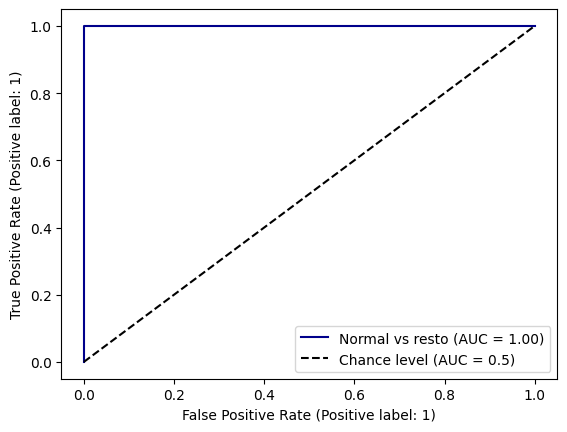

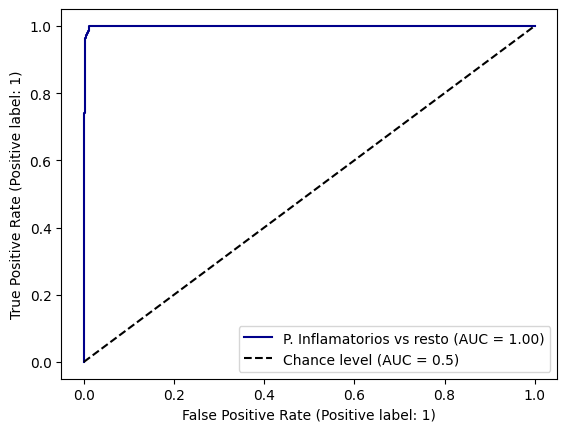

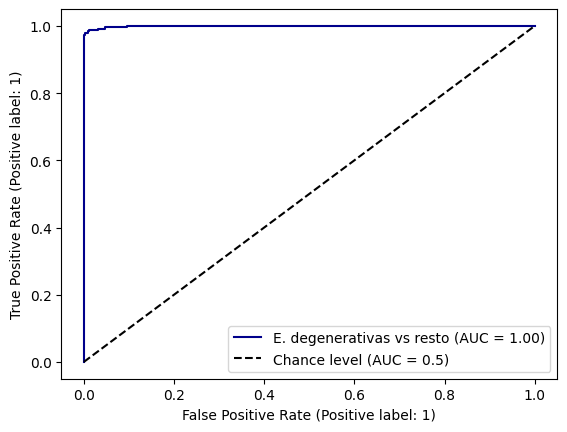

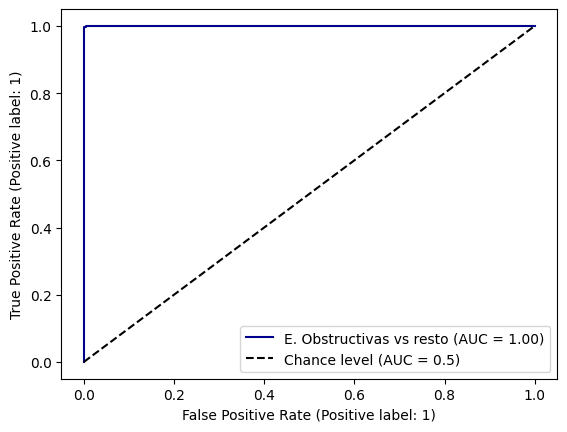

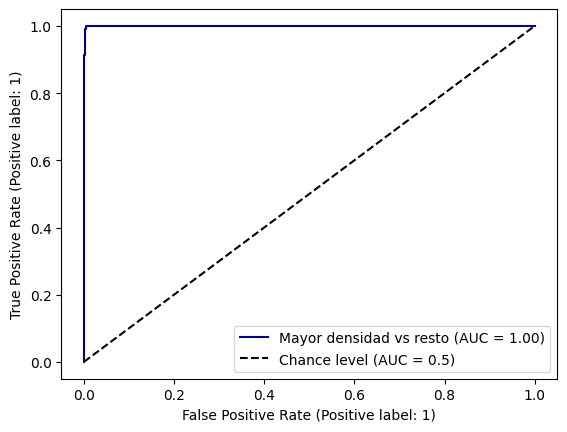

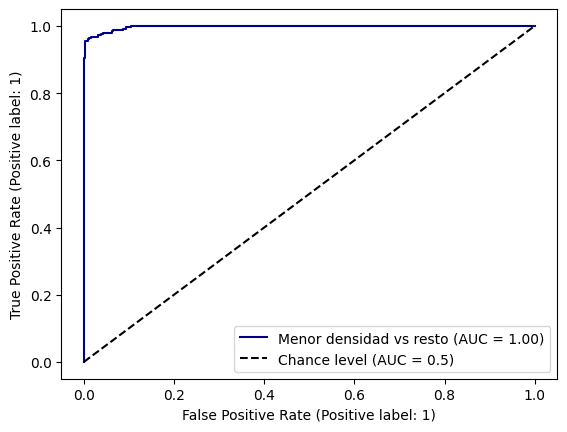

In [4]:
labels_cm = ['Normal', 'P. Inflamatorios', 'E. degenerativas', 'E. Obstructivas', 'Mayor densidad', 'Menor densidad']

for i in range(0, len(labels_cm)):

    RocCurveDisplay.from_predictions(

        true_labels[:, i],
        pred_labels[:, i],
        name =f"{labels_cm[i]} vs resto",
        color = "darkblue",
        plot_chance_level=True,
    )

Accuracy:  0.9826667
TPR:  1.0
FNR:  0.0
TNR:  0.996
FPR:  0.004
Weighted f1:  0.982685886845528
Precision:  0.99920064
Recall:  1.0
Accuracy (calculada):  0.9993333


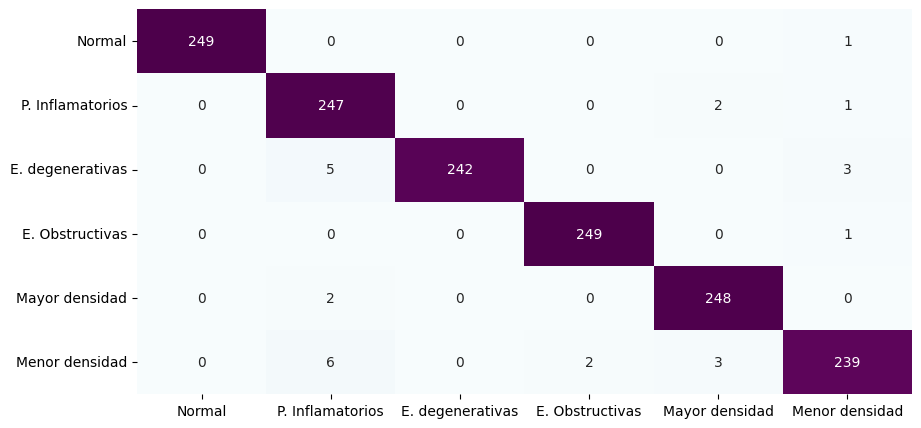

In [5]:
cm = confusion_matrix(true, pred)

fig, ax = plt.subplots(1, 1, figsize = (10, 5))
seaborn.heatmap(cm,  xticklabels = labels_cm, yticklabels = labels_cm, annot = True, cbar = False, fmt = 'g', cmap = 'BuPu');

m = tf.keras.metrics.Accuracy()
m.update_state(true, pred)
print("Accuracy: ", m.result().numpy())

fn, tn = tf.keras.metrics.FalseNegatives(), tf.keras.metrics.TrueNegatives()
fp, tp = tf.keras.metrics.FalsePositives(), tf.keras.metrics.TruePositives()

fn.update_state(true, pred)
tn.update_state(true, pred)
fp.update_state(true, pred)
tp.update_state(true, pred)

fn_val, tn_val = fn.result().numpy(), tn.result().numpy()
fp_val, tp_val = fp.result().numpy(), tp.result().numpy()

tpr, fnr = tp_val/(tp_val + fn_val), fn_val/(tp_val + fn_val)
tnr, fpr = tn_val/(tn_val + fp_val), fp_val/(tn_val + fp_val)

print("TPR: ", tpr)
print("FNR: ", fnr)
print("TNR: ", tnr)
print("FPR: ", fpr)

precision = tp_val/(tp_val + fp_val)
recall = tp_val/(tp_val + fn_val)
accuracy = (tp_val + tn_val)/(tp_val + tn_val + fp_val + fn_val)

f1score =  f1_score(true, pred, average = 'weighted')
print("Weighted f1: ", f1score)

print("Precision: ", precision)
print("Recall: ", recall)
print("Accuracy (calculada): ", accuracy)